In [217]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# CX Kaggle Competition: Mobile Price Classification

In this notebook you will be working on visualizing a Kaggle dataset containing sales data of mobiles phones of various companies. We'll perform Exploratory Data Analysis and learn some preliminary tips for working with Matplotlib and seaborn.

### Table of Contents

* [1. Data Loading](#loading)
* [2. Exploring the Features](#features)
* [3. Exploring Differences in Price](#response)

### Hosted by and maintained by [SAAS](https://saas.berkeley.edu). Authored by Carlos Gonzalez and Suparna Kompalli. 

<span id="loading"></span>

## Data Loading 

Assume you are hired as a consultant for a startup electronic company. This company wants to eventually compete with big tech giants such like Apple, Samsung, etc. They hire you to perform a data analysis on a collection of mobile phones sales data. The company affiliated with the particular device is obscured.



**Question 1:** Let's load our training and test sets using Pandas' ```pd.read_csv``` function. Fill in the following two lines with code which loads the ```train.csv``` and ```test.csv``` data sets into a ```pandas.DataFrame``` object. 

In [265]:
train = pd.read_csv('true_train.csv')
test = pd.read_csv('true_test.csv')

train.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,1859,0,0.5,1,3,0,22,0.7,164,1,...,1004,1654,1067,17,1,10,1,0,0,1
4,1821,0,1.7,0,4,1,10,0.8,139,8,...,381,1018,3220,13,8,18,1,0,1,3


Notice that the shape of ```train``` is (1500, 21), where we follow matrix notation (1500 rows, 21 cols). We can verify this by calling ```pd.DataFrame.shape```:

In [266]:
train.shape

(1500, 21)

Before diving straight in, let's get a feel for the variables in our data. We recommend taking a second to familiarize yourself with the dataframe before moving forward.

The column descriptions are as follows:

```battery_power``` - Total energy a battery can store in one time measured in mAh

```blue``` - Has bluetooth or not

```clock_speed``` - Speed at which microprocessor executes instructions

```dual_sim``` - Has dual sim support or not

```fc``` - Front Camera mega pixels

```four_g``` - Has 4G or not

```int_memory``` - Internal Memory in Gigabytes

```m_dep``` - Mobile Depth in cm

```mobile_wt``` - Weight of mobile phone

```n_cores``` - Number of cores of processor

```pc``` - Primary Camera mega pixels

```px_height``` - Pixel Resolution Height

```px_weidth``` - Pixel Resolution Width

```ram``` - Rando Access Memory in Megabytes

```sc_h``` - Screen Height of mobile in cm

```sc_w``` - Screen Width of mobile in cm

```talk_time``` - Longest time that a single battery charge will last when you are on the phone talking in hours.

```three_g``` - Has 3G or not

```touch_screen``` - Has touch screen or not

```wifi``` - Has wifi or not

**Question 2:** Based on the columns present in this data set and the values that they take, what do you think each row represents? That is, what is the granularity of this data set?

_Hint: Check the Data Loading Section_

*Answer: The specs of a particular mobile device, with its respective price range the time this data was recorded.*

**Question 3:** Now, we want to create a combined data set for the first step in our EDA process. Use Pandas' ```pd.concat``` function to append the rows of the training and test data sets together. 

In [267]:
combined = pd.concat([train, test], axis=0)
combined.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1.0
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2.0
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2.0
3,1859,0,0.5,1,3,0,22,0.7,164,1,...,1004,1654,1067,17,1,10,1,0,0,1.0
4,1821,0,1.7,0,4,1,10,0.8,139,8,...,381,1018,3220,13,8,18,1,0,1,3.0


Let's look at the unique values in the ```price_range``` column for the ```combined``` dataframe.

In [268]:
combined["price_range"].unique()

array([ 1.,  2.,  3.,  0., nan])

Take a look at the ```train``` and ```test``` dataframes and understand why there are None values in the ```price_range``` column of ```combined```.

<span id="features"></span>

## Exploring the Features

**Question 4:** Use the ```combined``` dataframe to visualize the distributions of two quantitative features of your choice. 

*Hint: What is a good visualization chart for a quantitative variable?*

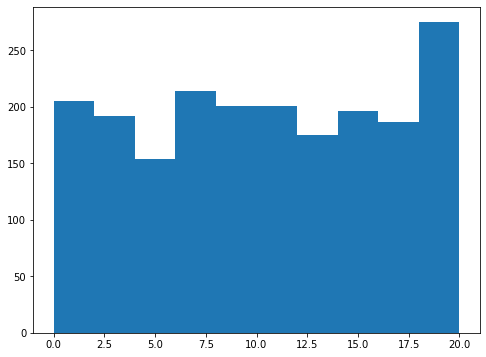

In [269]:
# Generate visualization #1 
# Any visualization suffices ...
plt.figure(figsize=(8, 6))
plt.hist(combined['pc'], bins=10);

*Interpretation: Left for the student*

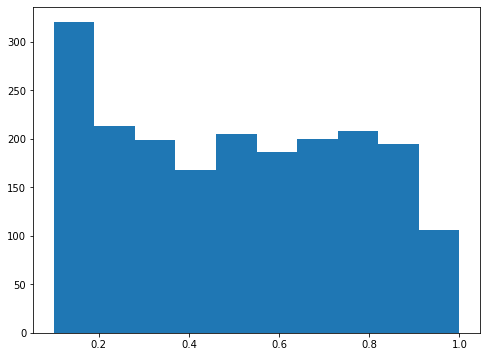

In [270]:
# Generate visualization #2 

plt.figure(figsize=(8, 6))
plt.hist(combined['m_dep'], bins=10);

*Interpretation: Left for the student*

**Question 5:** Use the Pandas' function ```df.describe()``` to generate summary statistics for the features available in the combined data set. What is roughly the percentage of mobile devices in this dataframe that have wifi? What about touch screen? What do these findings tell you about the types of phones in this collection?

In [271]:
combined.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,1500.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.510000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118362
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,1.000000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,2.000000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,3.000000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


*Answer: A subjective question. Notice that there is about an even percentage of mobile devices that are / aren't touch screen. Same applies for Wifi, which tells us this dataset has a variable collection of older and newer devices.* 

The correlation coefficient is defined as the degree to which changes of one variable predict change to another. In other words, this measure the strength of the linear relationship between two variables. We will more formally go over how to calculate this value later in the semester. The correlation coefficient can take on values


$$-1 <= r <= 1$$

A coefficient of zero represents no linear relationship. As one variable increases, there is no tendency in the other variable to either increase or decrease. When the value is in-between $0$ and $+1/-1$, there is a relationship, but the points don’t all fall on a line. As r approaches $-1$ or $1$, the strength of the relationship increases and the data points tend to fall closer to a line.

**Question 6:** How correlated are the ```px_height``` and ```px_width``` features in the ```combined``` data set? Interpret this correlation in words. 

*Hint: Use* ```np.corrcoef(...)``` *to calculate the value of $r$, the correlation coefficient.*

In [272]:
r = np.corrcoef(combined['px_height'], combined['px_width'])
print(f'The value of the correlation coefficient was: {r[0, 1]}')

The value of the correlation coefficient was: 0.5106644191393133


*Answer: There is a relative, positive correlation between the pixel resolution height and width of a mobile device.*

**Question 7:** It might also be useful to visualize the percentage of mobile device price ranges in the original dataset. Use the ```train``` dataframe to make a pie chart visualization of the ```price_range``` column. Do the percentages mean anything? Do the distributions of price ranges make testing the our data easier or harder?

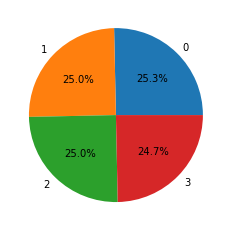

In [273]:
# Generate visualization #1 

pie_Price_Range = train
pie_Price_Range = pie_Price_Range['price_range'].value_counts().reset_index()
plt.pie(pie_Price_Range['price_range'], labels = pie_Price_Range.index, autopct='%1.1f%%');

*Answer: There is around an even number of mobile devices per price range, and comparing other forms of data in the dataset should be easier. This will allow for easier measurements of prices among different device specifications (i.e. testing average clockspeed per price range, etc) because the mobile devices are evenly distributed.*

<span id="response"></span>

## Exploring Differences in Price

Now, we will restrict our EDA to the training set in order to investigate trends in the response variable. Let us look at the hardware of the mobile devices and perform a basic analysis.

**Question 8:** Create a bar chat displaying the averages of ```ram``` in the ```train``` set. 

Text(0.5, 0, 'Price Range')

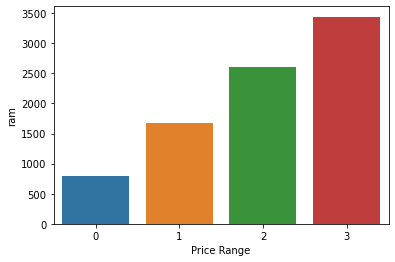

In [274]:
# Generate a bar chart of ram usage here 
top_position_salary = train.groupby('price_range').agg(np.mean)

sns.barplot(data = top_position_salary, x = [0, 1, 2, 3], y = "ram");
plt.xlabel("Price Range")

**Question 9:** Create a scatter plot using the ```train``` data to display the relationship between ```px_width``` and ```px_height```. What observations can be made? How does this relate to question 6?

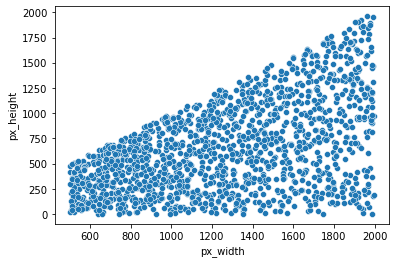

In [275]:
# Generate a scatterplot of px_width vs px_height here 

sns.scatterplot(data = train, x = 'px_width', y = 'px_height');

*We notice an apparent linear relationship, which supports our findings from question 6. There is some correlation between the two variables.*

Say, for example, the startup is looking to price one of their newer, more expensive phone prototypes. They have the option to either $1)$ make the phone lighter, performing and competing with other mobile devices within their expected price range, or $2)$ make the phone slightly heavier, with more advanced specs, thus slightly increasing the overall performance stats within it's expected price margin. The startup asks you whether a lighter or heavier phone would be appropriate for what they're attempting to sell.

It's hard to predict whether changing a particular feature will significantly impact the price of a mobile device. Let's make an overlaid histogram and see if we can draw any conclusions.

We're going to use the median weight from the ```train``` dataset to make this observation. Weight below the mean will be considered a "lighter" phone, and "heavier" phones will be denoted by a weight greater than or equal to the mean.

**Question 10:** Using the ```train``` dataset, produce two overlaid histrograms following the distribution of ```price_range```. The number of bins should be equal to the possible price range values, and your histograms should differ by the ```mobile_wt``` column's median in the ```train``` dataset.


<AxesSubplot:xlabel='price_range'>

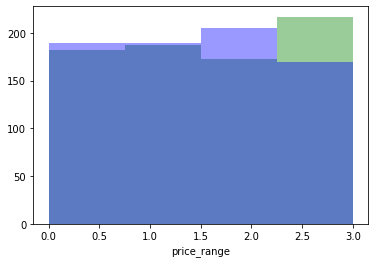

In [259]:
median_weight = train["mobile_wt"].median()

x = train[train["mobile_wt"] <= median_weight]["price_range"]
y = train[train["mobile_wt"] >= median_weight]["price_range"]

sns.distplot(x, kde = False, color = "green", bins = 4)
sns.distplot(y, kde = False, color = "blue", bins = 4)

Based on the histogram above, what type of device should the startup invest in: a lighter or heaver phone? How did you draw this conclusion from above?

*Answer: From the overlaid histogram, we notice that the overall proportion of mobile devices whose weight is less than the calculated median weight is greater than the proportion of devices with a greater median weight. It would be wise for this startup to invest in lighter technology that performs just as well as their heavier tech.*

**Question 11:** Great job! The startup wants you to to perform one more visualization for research purposes before you leave. Create a scatter plot to display the relationship between ```n_cores``` and ```ram``` of the mobile devices. Categorize by ```price_range```. What can we say about the scatterplot?

<AxesSubplot:xlabel='n_cores', ylabel='ram'>

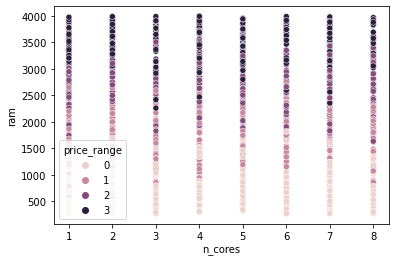

In [92]:
sns.scatterplot(data = train, x = "n_cores", y = "ram", hue = "price_range")

*Answer: Mobile devices with more ram are typically more expensive. Core processors don't really impact the overal price range of a particular mobile device.*

**Question 12:** Based on what we've observed thus far, what generalizations can we you infer from all of the visualizations above? Is there any conclusion that you can draw?

*Answer: Another subjective question, we open this for discussion!*